# <font color ='red' > Basic Library

In [3]:

from scipy import stats as s
from random import randint
from re import search
from pathlib import Path

# import pprint
from pprint import pprint 
import re, pprint, random, requests, glob

# from pandas_profiling import ProfileReport

#ProfileReport(df) # get all details like : min, max, correlation, else

import sys
from itertools import groupby
from operator import itemgetter
from timeit import timeit
from scipy.stats import mstats


from sklearn.base import TransformerMixin, BaseEstimator

from collections import Counter , defaultdict

import pandas as pd

pd.set_option('display.max_columns', None)


from pandas import Series as s , DataFrame as df
import numpy as np

import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

from matplotlib import pyplot as plt, rcParams as rc


%matplotlib inline
rc["figure.figsize"] = 10,6


#Data Science and ML
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFE #Recursive Feature Selection
import statsmodels.api as sm 

#preprocessing
from sklearn.preprocessing import StandardScaler, normalize, LabelEncoder

# GridSearchCV to find optimal min_samples_leaf, Model Selection
from sklearn.model_selection import GridSearchCV, KFold, train_test_split, StratifiedKFold, cross_val_score

from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA

# <font color ='orange' > Classification


In [4]:
#Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB


from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


# from catboost import CatBoostClassifier
import lightgbm as lgb

#Evaluation Metrics
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, recall_score, precision_score, explained_variance_score
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_recall_fscore_support


In [5]:
from sklearn.metrics import fbeta_score, make_scorer

from imblearn.over_sampling import SMOTE

from imblearn.combine import SMOTETomek # over sampling method 1

## RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler # over sampling method 2


#Shuffle the dataframe
# from sklearn.utils import shuffle # df1 = shuffle(df).reset_index(drop = True)

from imblearn.under_sampling import NearMiss

from pandas.api.types import is_numeric_dtype


### <font color ='green' > Data Understand ,Preprocessing, Cleaning,covert into binary, scaling  


In [66]:
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
submission = pd.read_csv("sample_submission.csv")


df1 = df[:]
df_test1 = df_test[:]

df.shape, df_test.shape, submission.shape

((50882, 14), (21805, 13), (21805, 2))

In [17]:
submission.head()

,ID,Response
0,50883,0
1,50884,0
2,50885,0
3,50886,0
4,50887,0


In [19]:
Counter(submission.Response)

Counter({0: 21805})

In [20]:
submission.shape

(21805, 2)

In [21]:
submission.isna().sum().sum()

0

In [22]:
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [23]:
df_test.head(2)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [26]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21805 entries, 0 to 21804
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       21805 non-null  int64  
 1   City_Code                21805 non-null  object 
 2   Region_Code              21805 non-null  int64  
 3   Accomodation_Type        21805 non-null  object 
 4   Reco_Insurance_Type      21805 non-null  object 
 5   Upper_Age                21805 non-null  int64  
 6   Lower_Age                21805 non-null  int64  
 7   Is_Spouse                21805 non-null  object 
 8   Health Indicator         16778 non-null  object 
 9   Holding_Policy_Duration  13202 non-null  object 
 10  Holding_Policy_Type      13202 non-null  float64
 11  Reco_Policy_Cat          21805 non-null  int64  
 12  Reco_Policy_Premium      21805 non-null  float64
dtypes: float64(2), int64(5), object(6)
memory usage: 2.2+ MB


In [27]:
df.isna().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [28]:
df_test.isna().sum()

ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

# <font color = 'blue'> Dataset Reading or Data Understanding

In [31]:
def get_percentage_miss_value(dataset):
    higher_miss_value_column = []
    miss_threshold_value = 50
    
    for i in dataset.columns:
        if dataset[i].isna().sum() > 1: 
            perectange_val = (dataset[i].isna().sum() / len(dataset)) * 100
            print("Column-> " , i, ", total no of missing value : ",dataset[i].isna().sum() , " & :         ", round(perectange_val,2) ," %")
                
            if(perectange_val > miss_threshold_value):
                higher_miss_value_column.append(i)
            
    print("\n\n\n")
        
    if higher_miss_value_column:
        print("Higher Missing values in Columns for Delete : \n\n", higher_miss_value_column) 
        
        return higher_miss_value_column
    else:
        print("There are no Higher Column Missing values in Dataset")

In [32]:
missing_val = get_percentage_miss_value(df)


Column->  Health Indicator , total no of missing value :  11691  & :          22.98  %
Column->  Holding_Policy_Duration , total no of missing value :  20251  & :          39.8  %
Column->  Holding_Policy_Type , total no of missing value :  20251  & :          39.8  %




There are no Higher Column Missing values in Dataset


In [33]:
get_percentage_miss_value(df_test)

Column->  Health Indicator , total no of missing value :  5027  & :          23.05  %
Column->  Holding_Policy_Duration , total no of missing value :  8603  & :          39.45  %
Column->  Holding_Policy_Type , total no of missing value :  8603  & :          39.45  %




There are no Higher Column Missing values in Dataset


In [34]:
df.isna().sum().sum() , df_test.isna().sum().sum()

(52193, 22233)

In [41]:
def visualize_categorical_values(dataset):
    no_of_columns = 3
    no_of_rows = 3
    
    columns_object_type = [i for i in dataset.columns  if dataset[i].dtype == "object"]
    total_rows = (len(columns_object_type) // no_of_rows ) + 1
    
    f, axes = plt.subplots(total_rows, no_of_columns, figsize=(18,34))

    for ind, val in enumerate(columns_object_type):
        sns.countplot(df[val] , ax = axes[ind // no_of_rows , ind %no_of_columns ])
    plt.show()   

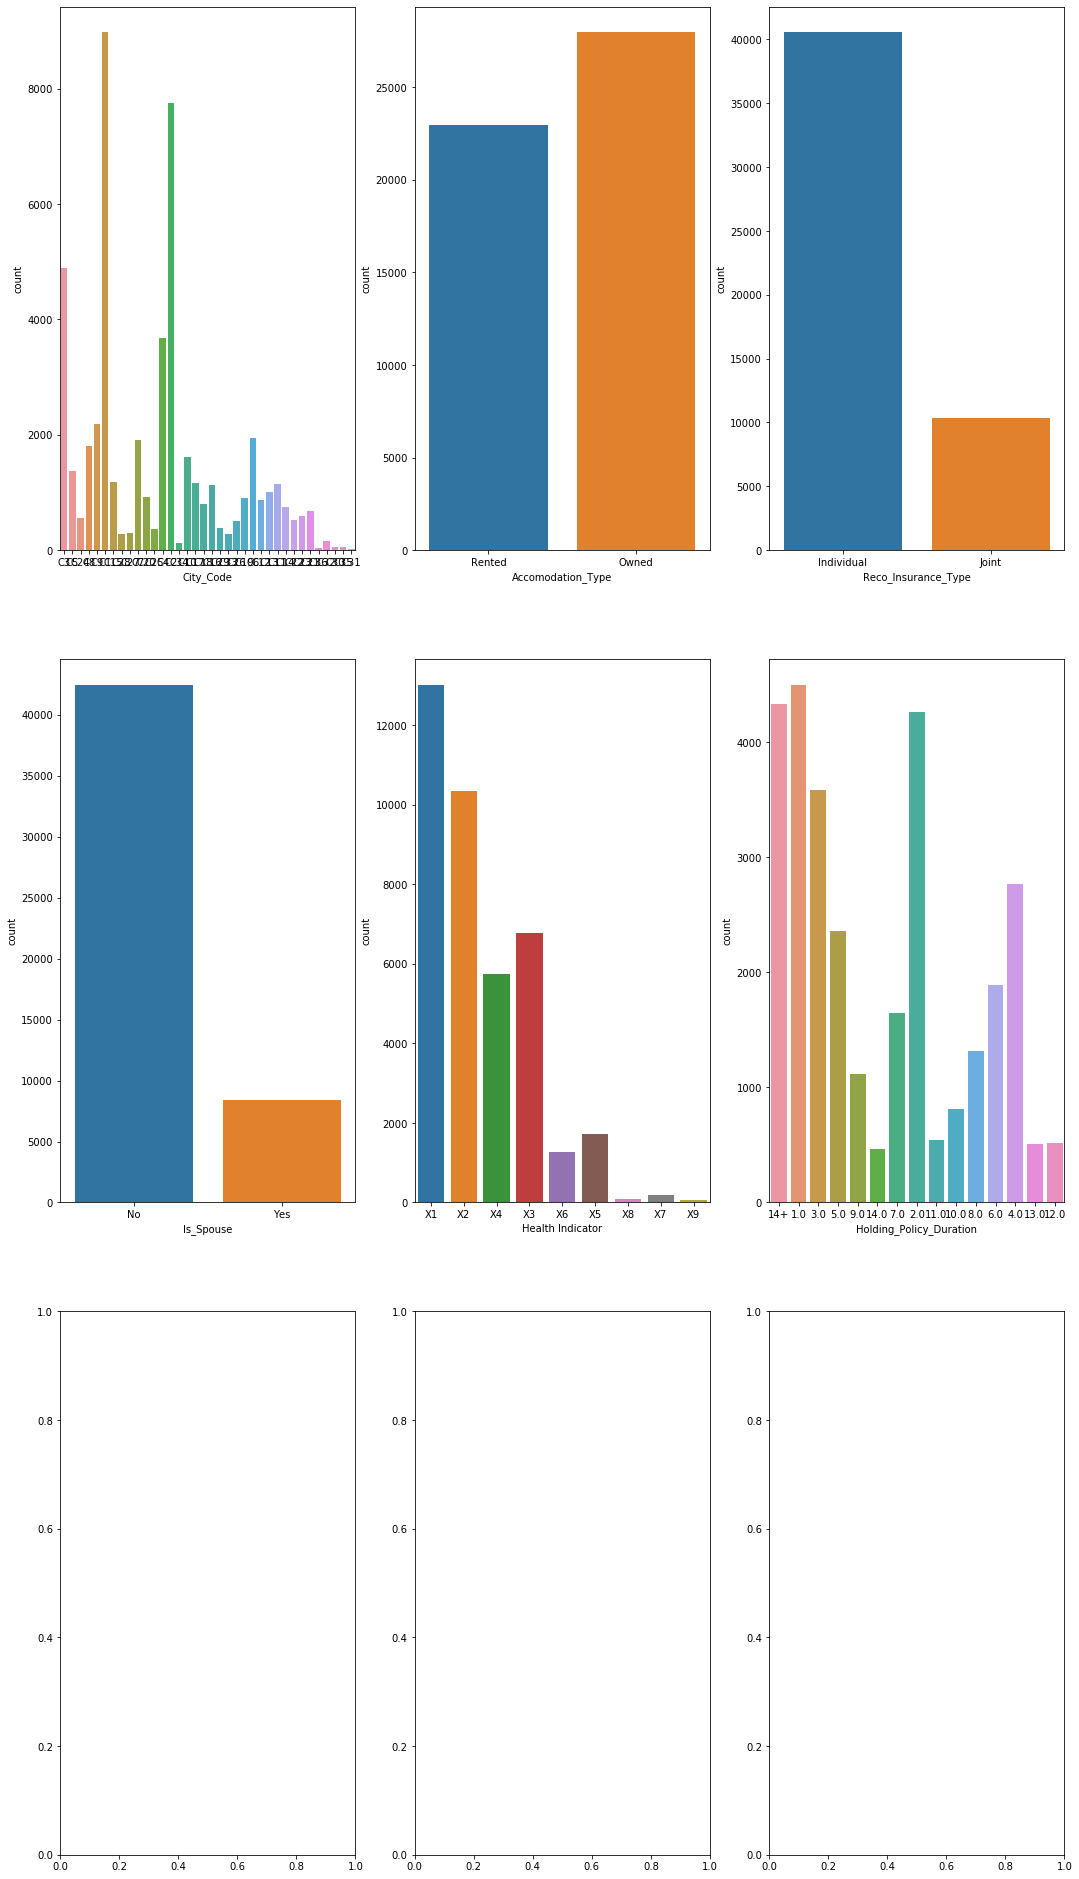

In [42]:
visualize_categorical_values(df)

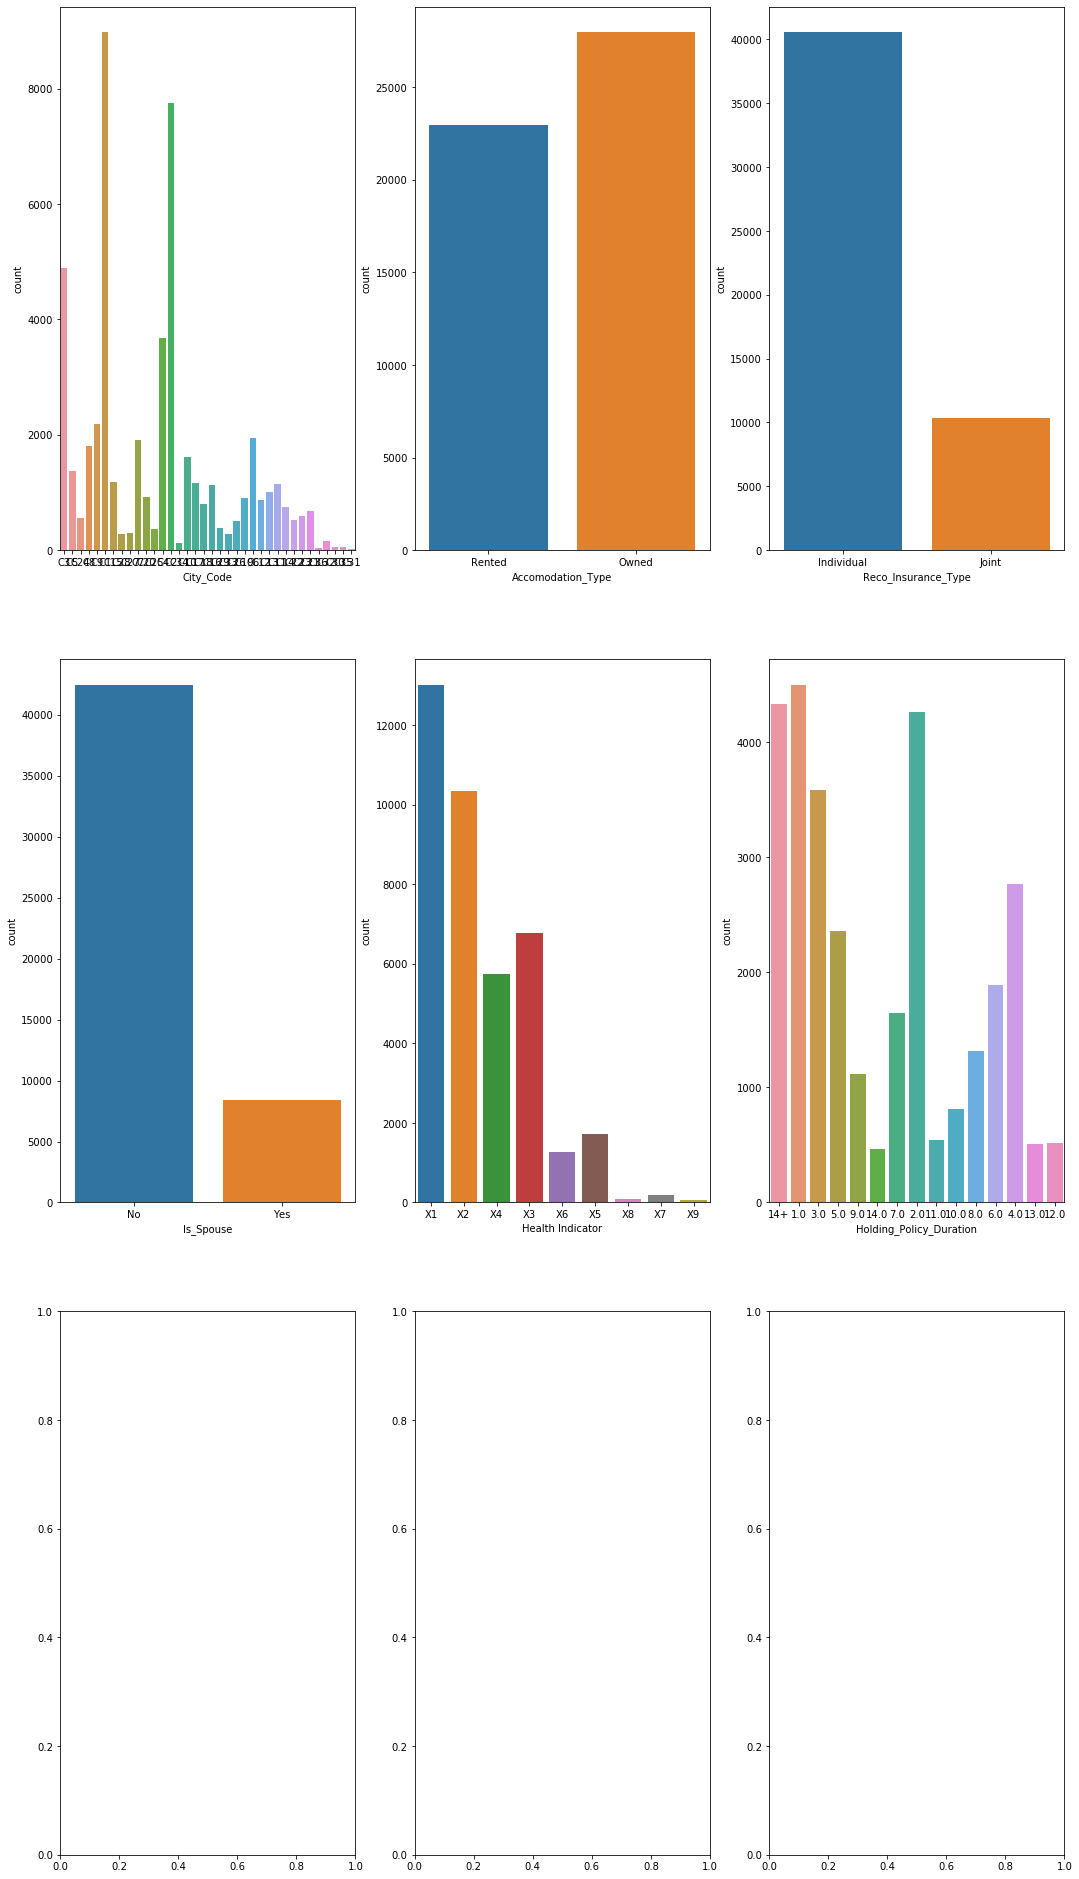

In [43]:
visualize_categorical_values(df_test)

In [45]:
def visualize_numberical_values(dataset):
    plt.figure(figsize=(18,34))
    sns.pairplot(df)
    plt.show() 

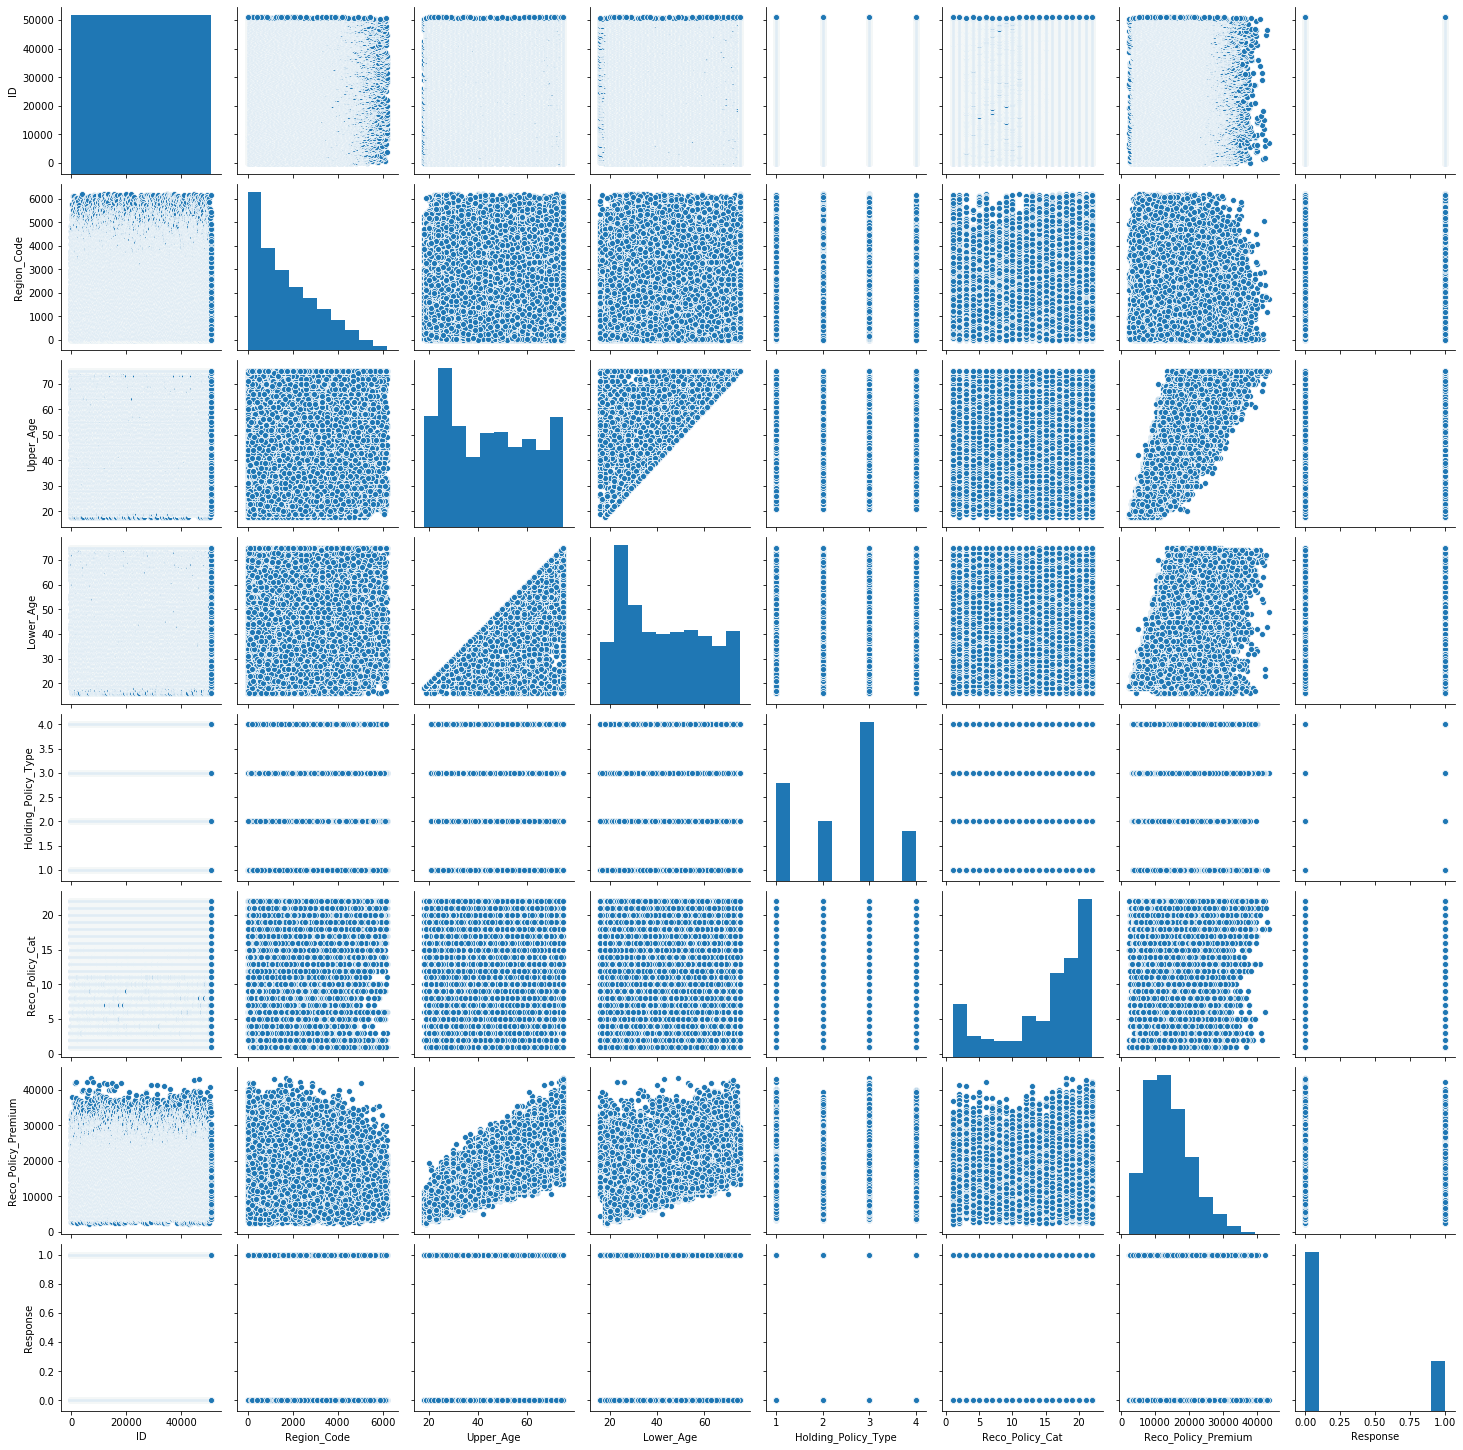

In [46]:
sns.pairplot(df)
plt.show()

In [47]:
# sns.pairplot(df_test)
# plt.show()

In [48]:
Counter(df.Response)

Counter({0: 38673, 1: 12209})

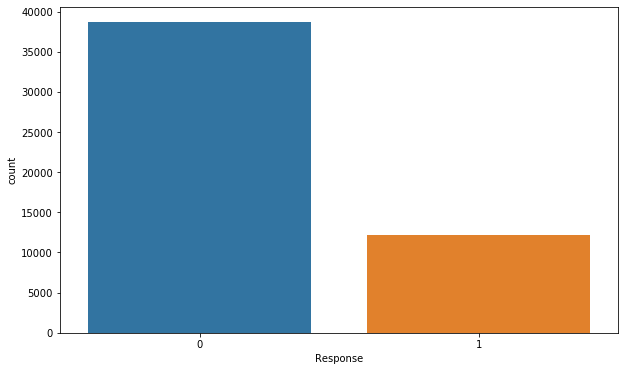

In [49]:
sns.countplot(df.Response)

In [60]:
round((df[df.Response == 0].shape[0] / len(df))*100, 2),round((df[df.Response == 1].shape[0] / len(df))*100, 2)

(76.01, 23.99)

it seems that imbalance dataset

In [50]:
def check_cloumn_details_type_categorical(dataset):
    for i in dataset.columns:
        if(dataset[i].dtype == "object"):
            print("Columns name :  ",i  )
            
            print(dict(Counter(dataset[i])))
            
            print("*"*100)
            print("\n")

In [51]:
check_cloumn_details_type_categorical(df)

Columns name :   City_Code
{'C3': 4889, 'C5': 1364, 'C24': 553, 'C8': 1806, 'C9': 2185, 'C1': 8973, 'C15': 1186, 'C28': 285, 'C27': 295, 'C7': 1910, 'C20': 926, 'C25': 366, 'C4': 3671, 'C2': 7747, 'C34': 130, 'C10': 1611, 'C17': 1159, 'C18': 797, 'C16': 1135, 'C29': 387, 'C33': 286, 'C26': 499, 'C19': 899, 'C6': 1950, 'C12': 868, 'C13': 1005, 'C11': 1147, 'C14': 746, 'C22': 516, 'C23': 587, 'C21': 679, 'C36': 36, 'C32': 160, 'C30': 58, 'C35': 56, 'C31': 15}
****************************************************************************************************


Columns name :   Accomodation_Type
{'Rented': 22931, 'Owned': 27951}
****************************************************************************************************


Columns name :   Reco_Insurance_Type
{'Individual': 40536, 'Joint': 10346}
****************************************************************************************************


Columns name :   Is_Spouse
{'No': 42460, 'Yes': 8422}
*******************************

In [52]:
check_cloumn_details_type_categorical(df_test)

Columns name :   City_Code
{'C1': 3789, 'C4': 1559, 'C3': 2065, 'C2': 3331, 'C13': 424, 'C18': 334, 'C16': 478, 'C17': 530, 'C11': 514, 'C7': 788, 'C21': 305, 'C34': 59, 'C14': 343, 'C8': 773, 'C12': 442, 'C6': 819, 'C10': 680, 'C9': 904, 'C23': 255, 'C32': 80, 'C26': 232, 'C15': 477, 'C24': 270, 'C20': 444, 'C19': 365, 'C5': 599, 'C28': 109, 'C30': 23, 'C25': 170, 'C29': 146, 'C27': 142, 'C33': 106, 'C22': 197, 'C36': 18, 'C35': 33, 'C31': 2}
****************************************************************************************************


Columns name :   Accomodation_Type
{'Owned': 12090, 'Rented': 9715}
****************************************************************************************************


Columns name :   Reco_Insurance_Type
{'Individual': 17341, 'Joint': 4464}
****************************************************************************************************


Columns name :   Is_Spouse
{'No': 18227, 'Yes': 3578}
***********************************************

In [53]:
def check_cloumn_details_type_numberical(dataset):
    for i in dataset.columns:
        if (dataset[i].dtype == "int"):
            print("Columns name :  ",i  )
            
            print(dict(Counter(dataset[i])))
            print("*"*100)
            print("\n")
            
            
def check_cloumn_details_type_float(dataset):
    for i in dataset.columns:
        if (dataset[i].dtype == "float"):
            print("Columns name :  ",i  )
            
            print(dict(Counter(dataset[i])))
            print("*"*100)
            print("\n")

In [46]:
check_cloumn_details_type_numberical(df)

Columns name :   enrollee_id
{23798: 1, 29166: 1, 46: 1, 18527: 1, 21751: 1, 13342: 1, 11746: 1, 24127: 1, 7615: 1, 9676: 1, 32957: 1, 13091: 1, 681: 1, 33356: 1, 20247: 1, 19752: 1, 28429: 1, 16508: 1, 13977: 1, 2776: 1, 16443: 1, 16067: 1, 20897: 1, 25178: 1, 3472: 1, 30466: 1, 18230: 1, 5634: 1, 11753: 1, 20881: 1, 23129: 1, 10386: 1, 5861: 1, 7537: 1, 14983: 1, 4957: 1, 13970: 1, 5325: 1, 32506: 1, 7006: 1, 5104: 1, 4653: 1, 18048: 1, 8861: 1, 10504: 1, 18446: 1, 20785: 1, 32244: 1, 23890: 1, 1501: 1, 5298: 1, 14257: 1, 32472: 1, 31515: 1, 11053: 1, 26862: 1, 26834: 1, 12935: 1, 27162: 1, 27439: 1, 11777: 1, 20501: 1, 5735: 1, 20605: 1, 16154: 1, 26681: 1, 9723: 1, 23783: 1, 24692: 1, 18022: 1, 27259: 1, 1297: 1, 21843: 1, 29170: 1, 28674: 1, 2196: 1, 31802: 1, 18150: 1, 26051: 1, 26651: 1, 4903: 1, 11934: 1, 19102: 1, 12006: 1, 6017: 1, 26507: 1, 16462: 1, 13854: 1, 25275: 1, 27329: 1, 14164: 1, 31021: 1, 28038: 1, 31131: 1, 6279: 1, 27425: 1, 10779: 1, 7286: 1, 18410: 1, 3340: 1,

In [54]:
check_cloumn_details_type_numberical(df_test)

Columns name :   ID
{50883: 1, 50884: 1, 50885: 1, 50886: 1, 50887: 1, 50888: 1, 50889: 1, 50890: 1, 50891: 1, 50892: 1, 50893: 1, 50894: 1, 50895: 1, 50896: 1, 50897: 1, 50898: 1, 50899: 1, 50900: 1, 50901: 1, 50902: 1, 50903: 1, 50904: 1, 50905: 1, 50906: 1, 50907: 1, 50908: 1, 50909: 1, 50910: 1, 50911: 1, 50912: 1, 50913: 1, 50914: 1, 50915: 1, 50916: 1, 50917: 1, 50918: 1, 50919: 1, 50920: 1, 50921: 1, 50922: 1, 50923: 1, 50924: 1, 50925: 1, 50926: 1, 50927: 1, 50928: 1, 50929: 1, 50930: 1, 50931: 1, 50932: 1, 50933: 1, 50934: 1, 50935: 1, 50936: 1, 50937: 1, 50938: 1, 50939: 1, 50940: 1, 50941: 1, 50942: 1, 50943: 1, 50944: 1, 50945: 1, 50946: 1, 50947: 1, 50948: 1, 50949: 1, 50950: 1, 50951: 1, 50952: 1, 50953: 1, 50954: 1, 50955: 1, 50956: 1, 50957: 1, 50958: 1, 50959: 1, 50960: 1, 50961: 1, 50962: 1, 50963: 1, 50964: 1, 50965: 1, 50966: 1, 50967: 1, 50968: 1, 50969: 1, 50970: 1, 50971: 1, 50972: 1, 50973: 1, 50974: 1, 50975: 1, 50976: 1, 50977: 1, 50978: 1, 50979: 1, 50980: 1,

In [55]:
check_cloumn_details_type_float(df)

Columns name :   Holding_Policy_Type
{3.0: 13279, nan: 1, 1.0: 8173, nan: 1, 4.0: 4174, nan: 1, 2.0: 5005, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 

In [56]:
check_cloumn_details_type_float(df_test)

Columns name :   Holding_Policy_Type
{3.0: 5572, 4.0: 1906, nan: 1, nan: 1, nan: 1, nan: 1, 1.0: 3574, nan: 1, 2.0: 2150, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1

In [69]:
def check_skewness_numerical(dataset,target):
    #analysing the distribution of HR Selection
    print('skew is', dataset[target].skew())   
    plt.hist(dataset[target], color= 'b')

    plt.title('Distribution of Response YES / NO', fontsize = 24)
    plt.ylabel('observation', fontsize = 20)
    plt.xlabel('selection', fontsize = 20)

    plt.show()
    
# check_skewness_numerical(df , "target")

skew is 1.2179355656006088


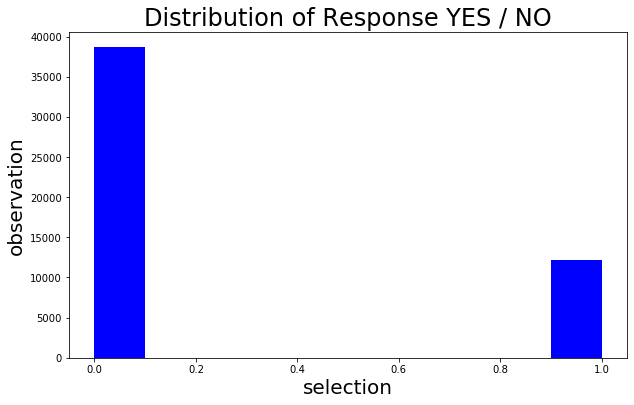

In [70]:
check_skewness_numerical(df , "Response")

In [77]:
def drop_outliers(dataset, columns_name):
    for chk in columns_name:
        
#         plt.boxplot(dataset[chk]) # please with graph & it is optional
        
        Q1 = dataset[chk].quantile(.05)
        Q3 = dataset[chk].quantile(.95)
        IQR = Q3-Q1
        dataset =  dataset[(dataset[chk] >= (Q1-(1.5*IQR))) & (dataset[chk] <= (Q3+(1.5*IQR)))] 
    return dataset

In [78]:
# dataframe_columns_name = numberical_float_columns + numberical_int_columns
# print(dataframe_columns_name)

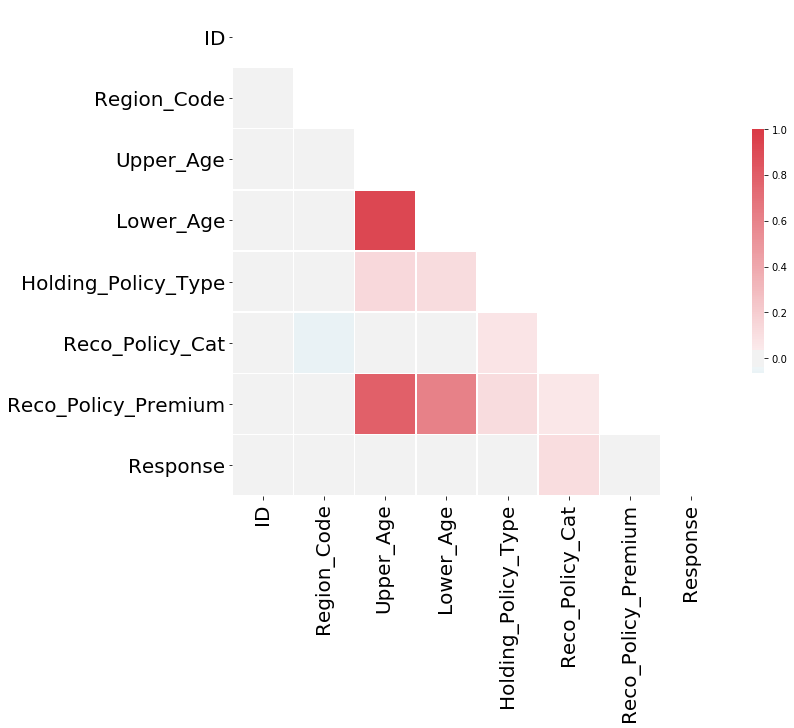

In [79]:
#To find correlation among varibales
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap='RdYlGn')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});
ax.tick_params(labelsize=20)

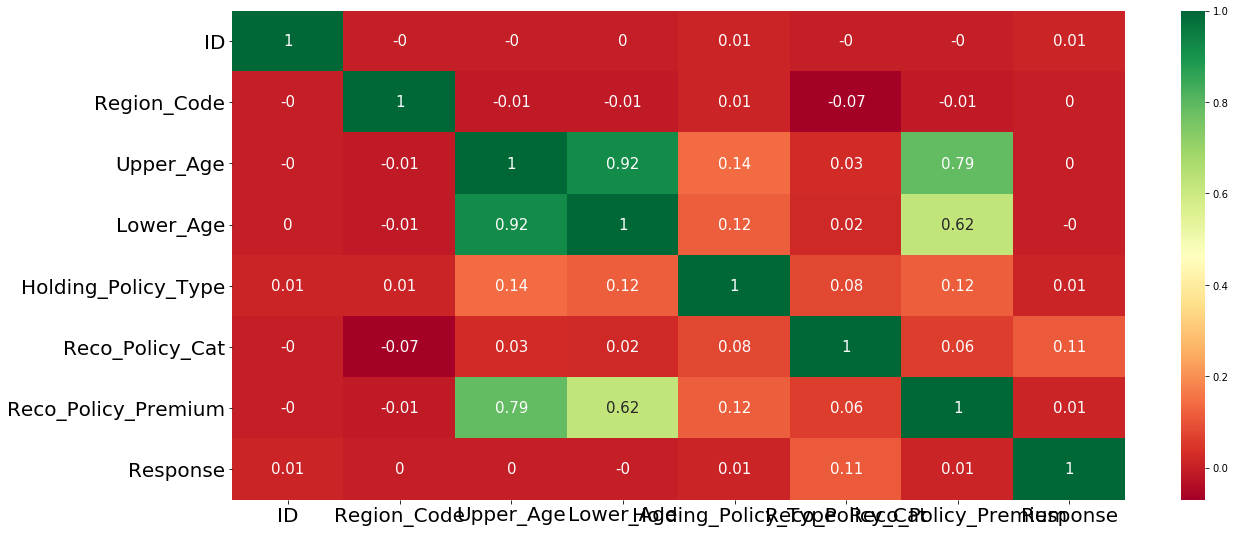

In [80]:
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corr.apply(lambda x : np.round(x,2)), 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,annot=True,cmap='RdYlGn', annot_kws={"size": 15})
ax.tick_params(labelsize=20)
plt.show()

# <font color = 'green'> EDA

# <font color = 'orange'> 1) Data Cleaning

In [82]:
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18359 non-null  int64  
 1   city                    18359 non-null  object 
 2   city_development_index  18359 non-null  float64
 3   gender                  14261 non-null  object 
 4   relevent_experience     18359 non-null  object 
 5   enrolled_university     18017 non-null  object 
 6   education_level         17902 non-null  object 
 7   major_discipline        15521 non-null  object 
 8   experience              18300 non-null  object 
 9   company_size            13580 non-null  object 
 10  company_type            13320 non-null  object 
 11  last_new_job            17992 non-null  object 
 12  training_hours          18359 non-null  int64  
 13  target                  18359 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

In [83]:
df1 = df[:]
df_test1 = df_test[:]

# df1 = df.drop(columns = drop_not_imp_col , axis = 1)

print(df1.shape, df_test1.shape)

df1 = df1.drop("ID" , axis=1)
df_test1 = df_test1.drop("ID" , axis=1)
df1.shape, df_test1.shape

print(df1.shape, df_test1.shape)


(50882, 14) (21805, 13)
(50882, 13) (21805, 12)


In [84]:
get_percentage_miss_value(df1)

Column->  Health Indicator , total no of missing value :  11691  & :          22.98  %
Column->  Holding_Policy_Duration , total no of missing value :  20251  & :          39.8  %
Column->  Holding_Policy_Type , total no of missing value :  20251  & :          39.8  %




There are no Higher Column Missing values in Dataset


In [86]:
get_percentage_miss_value(df_test1)

Column->  Health Indicator , total no of missing value :  5027  & :          23.05  %
Column->  Holding_Policy_Duration , total no of missing value :  8603  & :          39.45  %
Column->  Holding_Policy_Type , total no of missing value :  8603  & :          39.45  %




There are no Higher Column Missing values in Dataset


In [90]:
df1.isna().sum().sum(), df_test1.isna().sum().sum()

0

In [87]:
df1["Health Indicator"].fillna(df1["Health Indicator"].mode()[0],  inplace = True)
df1["Holding_Policy_Duration"].fillna(df1["Holding_Policy_Duration"].mode()[0],  inplace = True)
df1["Holding_Policy_Type"].fillna(df1["Holding_Policy_Type"].mean(),  inplace = True)



df_test1["Health Indicator"].fillna(df_test1["Health Indicator"].mode()[0],  inplace = True)
df_test1["Holding_Policy_Duration"].fillna(df_test1["Holding_Policy_Duration"].mode()[0],  inplace = True)
df_test1["Holding_Policy_Type"].fillna(df_test1["Holding_Policy_Type"].mean(),  inplace = True)


In [91]:
df1.isna().sum().sum(), df_test1.isna().sum().sum()

(0, 0)

In [558]:
# df2 = DataFrameImputer().fit_transform(df1)
# df3.shape

(18359, 14)

In [92]:
# df_test2 = DataFrameImputer().fit_transform(df_test1)
# df3_test.shape

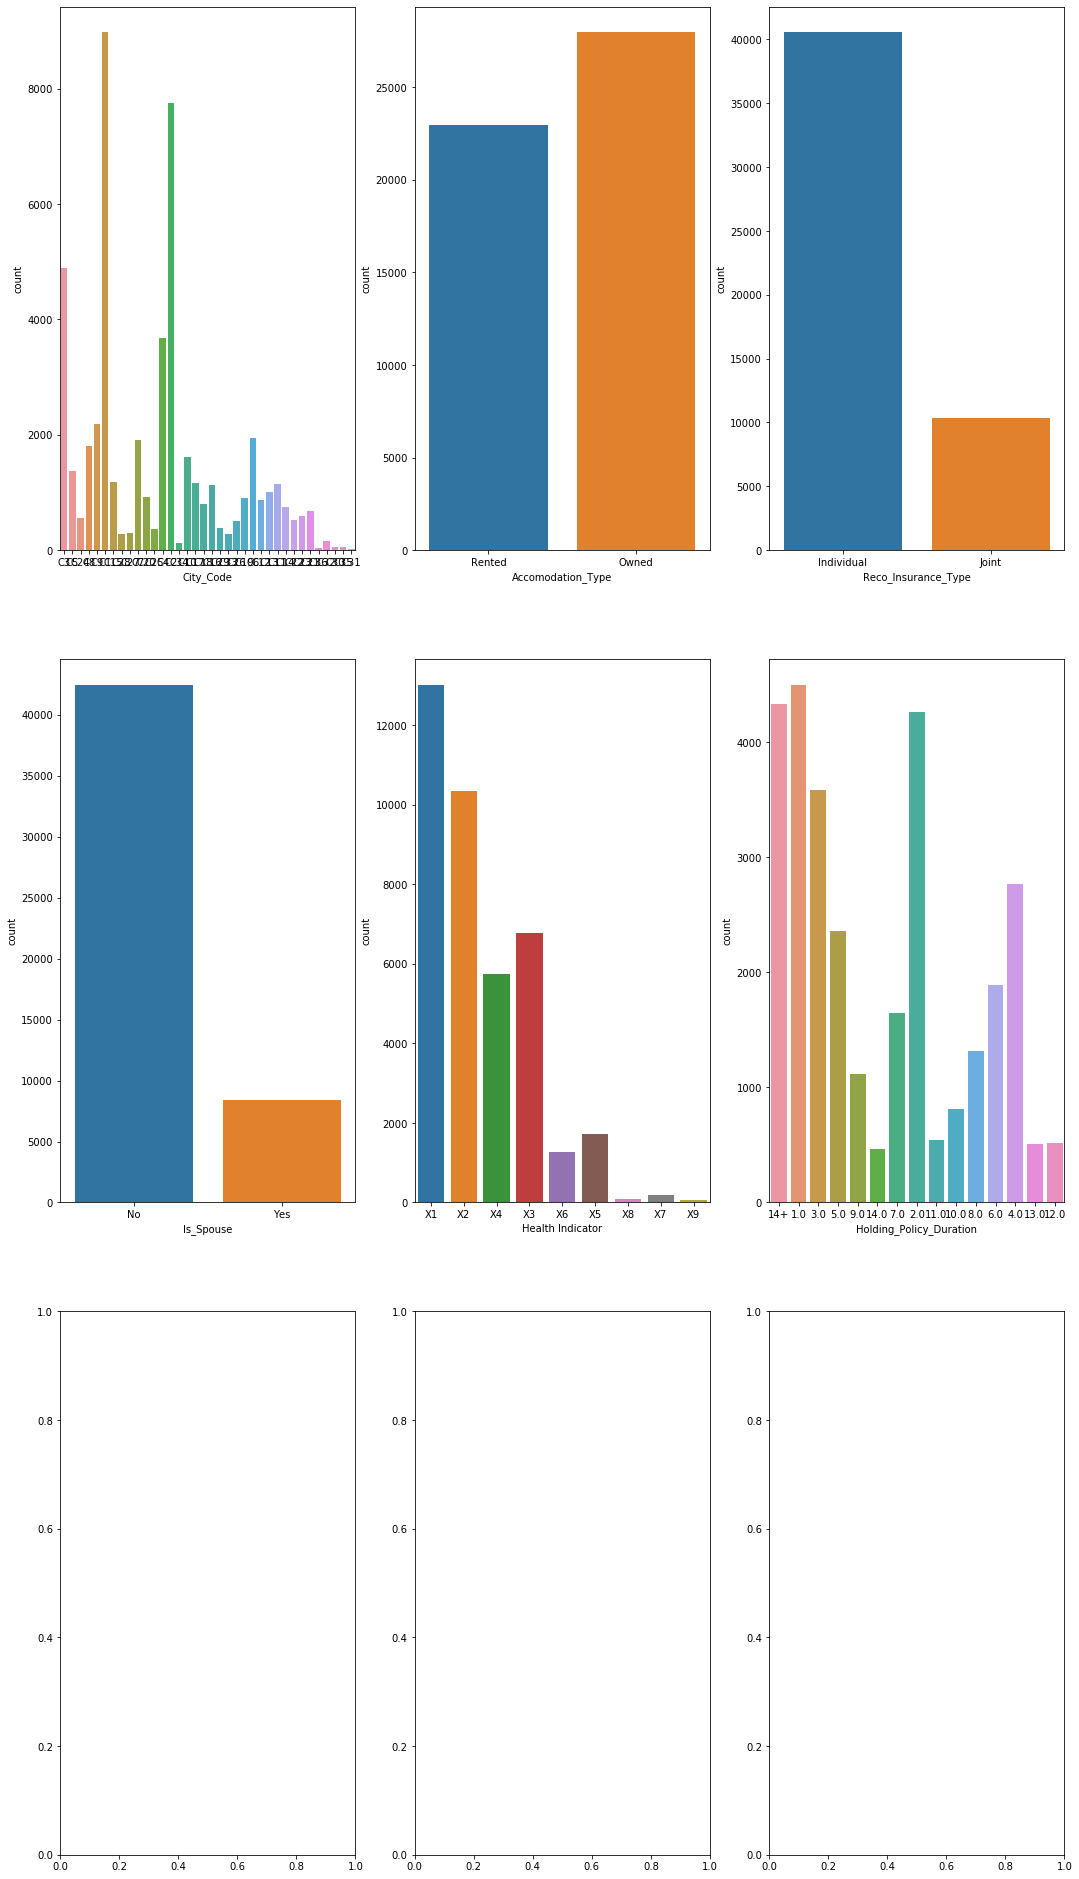

In [93]:
visualize_categorical_values(df1)

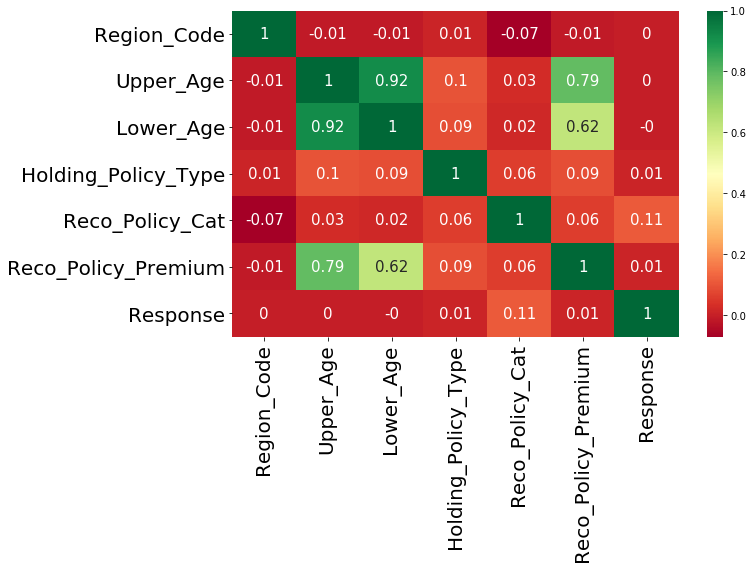

In [95]:
corr = df1.corr()
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corr.apply(lambda x : np.round(x,2)), 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,annot=True,cmap='RdYlGn', annot_kws={"size": 15})
ax.tick_params(labelsize=20)
plt.show()

In [96]:
def convert_to_numerical_datatype_train(dataset):
    enc = LabelEncoder()
    for i in dataset.columns:
        if(dataset[i].dtype == "object"):
            dataset[i] = enc.fit_transform(dataset[i])
            
    return dataset

In [102]:
df1.head(1)

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0


In [97]:
df2 = convert_to_numerical_datatype_train(df1.copy())
df2.shape , df1.shape

((50882, 13), (50882, 13))

In [103]:
df2.head(1)

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,22,3213,1,0,36,36,0,0,5,3.0,22,11628.0,0


In [98]:
df_test1.head(2)

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,C1,156,Owned,Individual,30,30,No,X1,6.0,3.0,5,11934.0
1,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8


In [100]:
df_test2 = convert_to_numerical_datatype_train(df_test1.copy())
df_test2.shape , df_test1.shape

((21805, 12), (21805, 12))

In [101]:
df_test2.head(2)

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,0,156,0,0,30,30,0,0,11,3.0,5,11934.0
1,30,7,0,1,69,68,1,0,8,3.0,18,32204.8


# <font color ='green' > Imbalanced Dataset(Over Sampling) : Majority Classes

In [104]:
df2.head(3)

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,22,3213,1,0,36,36,0,0,5,3.000000,22,11628.0,0
1,31,1117,0,1,75,22,0,1,0,2.439228,22,30510.0,0
2,31,3732,0,0,32,32,0,0,0,1.000000,19,7450.0,1


In [105]:
columns = df2.columns.tolist()
columns = [c for c in columns if c not in ["Response"]]

X2 = df2[columns]
Y2 = df2["Response"]

os =  RandomOverSampler(random_state=35)
X_2 , y_2= os.fit_sample(X2, Y2)


In [109]:
Counter(df2.Response), X_2.shape , y_2.shape, df2.shape

(Counter({0: 38673, 1: 12209}), (77346, 12), (77346,), (50882, 13))

In [110]:
Counter(y_2)

Counter({0: 38673, 1: 38673})

# <font color ='red' > Feature Engineering

In [112]:
# X = df5.iloc[:,:-1]
# Y = df5.iloc[:,-1]


X = X_2
Y = y_2

In [113]:
X.head(3)

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,22,3213,1,0,36,36,0,0,5,3.000000,22,11628.0
1,31,1117,0,1,75,22,0,1,0,2.439228,22,30510.0
2,31,3732,0,0,32,32,0,0,0,1.000000,19,7450.0


In [114]:
# splitting the data into training sets and testing set
X_train, X_test, y_train, y_test = train_test_split(X ,Y , test_size = 0.40 , random_state = 10)

In [115]:
model1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

# model1 = XGBClassifier()

In [116]:
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

In [117]:
accuracy_score(y_test, y_pred) , precision_score(y_test, y_pred) , recall_score(y_test, y_pred) , roc_auc_score(y_test, y_pred)

(0.7341219819645108,
 0.7129667504236545,
 0.7864002578150178,
 0.7339677637622807)

In [118]:
confusion_matrix(y_test, y_pred)

array([[10512,  4912],
       [ 3314, 12201]])

In [119]:
Counter(y_pred)

Counter({1: 17113, 0: 13826})

In [120]:
X_train.columns

Index(['City_Code', 'Region_Code', 'Accomodation_Type', 'Reco_Insurance_Type',
       'Upper_Age', 'Lower_Age', 'Is_Spouse', 'Health Indicator',
       'Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat',
       'Reco_Policy_Premium'],
      dtype='object')

In [121]:
def get_accuracy(y_train_val , y_pred_val , dataset_type = "Default"):
    
    print(" Dataset type is : ", dataset_type)
    
    accuracy = accuracy_score(y_train_val, y_pred_val)
    accuracy = round(accuracy, 4) * 100
    print("\n Accuracy Score     : ",accuracy)
    
    precision_accuracy = precision_score(y_train_val, y_pred_val)
    precision_accuracy = round(precision_accuracy, 4) * 100
    print("\n precision_accuracy : ",precision_accuracy)
    
    recall_accuracy = recall_score(y_train_val, y_pred_val)
    recall_accuracy = round(recall_accuracy, 4) * 100
    print("\n recall_accuracy    : ",recall_accuracy)
    
    roc_auc_accuracy = roc_auc_score(y_train_val, y_pred_val)
    roc_auc_accuracy = round(roc_auc_accuracy, 4) * 100
    print("\n roc_auc_accuracy   : ",roc_auc_accuracy)
    

In [122]:
get_accuracy(y_test, y_pred , "Train")

 Dataset type is :  Train

 Accuracy Score     :  73.41

 precision_accuracy :  71.3

 recall_accuracy    :  78.64

 roc_auc_accuracy   :  73.4


In [124]:
rows=[]
def addRandomStateForAlgorithm(x,y,names,algorithms,columns_name,random_state_list):    
    for j in range(len(algorithms)):
        model = algorithms[j]
        for i in random_state_list:
            x_train, x_test , y_train , y_test = train_test_split(x ,y , test_size = 0.25 , random_state = i)
            model.fit(x_train,y_train)
            pred_test = model.predict(x_test)
            row = [names[j],i,r2_score (y_test,pred_test)]
            rows.append(row)
    models_df = pd.DataFrame(rows)   
    models_df.columns = columns_name
    print(models_df)


rows=[]

def addRandomStateForAlgorithm(x,y,names,algorithms,columns_name,random_state_list):    
    for j in range(len(algorithms)):
        model = algorithms[j]
        for i in random_state_list:
            
            x_train, x_test , y_train , y_test = train_test_split(x ,y , test_size = 0.30 , random_state = i)
            
            model.fit(x_train,y_train)
            
            y_pred_train = model.predict(x_train)
            y_pred = model.predict(x_test)
            
            train_acc = accuracy_score(y_train, y_pred_train)
            train_acc = round(train_acc, 4) * 100
            
            test_acc = accuracy_score(y_test, y_pred)
            test_acc = round(test_acc, 4) * 100
            
            roc_auc_score_acc = roc_auc_score(y_test, y_pred)
            roc_auc_score_acc = round(roc_auc_score_acc, 4) * 100
            

            row = [names[j],   i,   train_acc, test_acc, roc_auc_score_acc]
    
            rows.append(row)
            
    models_df = pd.DataFrame(rows) 
    
    models_df.columns = columns_name
    print(models_df)
    


In [126]:
# names_regression = [ "LightGBM", "RF", "XGBoost" , "SVM"]
# algorithms = [ LGBMClassifier(), RandomForestClassifier(), XGBClassifier(), SVC()]


names_regression = [ "LightGBM", "RF", "XGBoost" ]
algorithms = [ LGBMClassifier(), RandomForestClassifier(), XGBClassifier()]

columns_name = ["Model",    "Random_state",   'Train_acc',     "Test_acc" , "roc_auc_score"]

random_state_list_up_to_10 = [1,2]


addRandomStateForAlgorithm(X,Y,names_regression,algorithms,columns_name,random_state_list_up_to_10)

       Model  Random_state  Train_acc  Test_acc  roc_auc_score
0   LightGBM             1      69.41     65.67          65.71
1   LightGBM             2      70.29     66.10          66.08
2   LightGBM             3      69.92     65.86          65.87
3         RF             1     100.00     89.60          89.60
4         RF             2     100.00     89.36          89.36
5         RF             3     100.00     89.65          89.65
6    XGBoost             1      76.18     69.26          69.28
7    XGBoost             2      77.21     69.24          69.23
8    XGBoost             3      76.28     68.88          68.89
9   LightGBM             1      69.41     65.67          65.71
10  LightGBM             2      70.29     66.10          66.08
11        RF             1     100.00     89.67          89.67
12        RF             2     100.00     89.52          89.52
13   XGBoost             1      76.18     69.26          69.28
14   XGBoost             2      77.21     69.24        

In [127]:
model_final = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)


In [128]:
X_train, X_test, y_train, y_test = train_test_split(X ,Y , test_size = 0.05 , random_state = 10)

# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)


Starting training...
[1]	valid_0's l2: 0.248025	valid_0's l1: 0.497973
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l2: 0.246363	valid_0's l1: 0.496181
[3]	valid_0's l2: 0.244804	valid_0's l1: 0.494421
[4]	valid_0's l2: 0.244734	valid_0's l1: 0.494346
[5]	valid_0's l2: 0.24466	valid_0's l1: 0.494262
[6]	valid_0's l2: 0.243243	valid_0's l1: 0.492585
[7]	valid_0's l2: 0.242062	valid_0's l1: 0.49114
[8]	valid_0's l2: 0.241939	valid_0's l1: 0.491011
[9]	valid_0's l2: 0.240739	valid_0's l1: 0.48948
[10]	valid_0's l2: 0.239651	valid_0's l1: 0.488005
[11]	valid_0's l2: 0.238666	valid_0's l1: 0.486641
[12]	valid_0's l2: 0.238619	valid_0's l1: 0.486588
[13]	valid_0's l2: 0.237857	valid_0's l1: 0.485517
[14]	valid_0's l2: 0.237025	valid_0's l1: 0.484305
[15]	valid_0's l2: 0.236324	valid_0's l1: 0.483197
[16]	valid_0's l2: 0.235676	valid_0's l1: 0.482145
[17]	valid_0's l2: 0.235069	valid_0's l1: 0.481092
[18]	valid_0's l2: 0.234973	valid_0's l1: 0.480983
[19]	valid_0'

In [132]:
# y_pred_final = gbm.predict(df_test2, num_iteration=gbm.best_iteration)

create_submission_file(gbm, "submission_gbm_1", df_test2)

'submission_gbm_1 csv submission created successful'

In [ ]:
# y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

In [673]:
# Create a based model
# model_final = RandomForestClassifier()

In [675]:
# # Create the parameter grid based on the results of random search 
# param_grid = {
#     'max_depth': [4,8,10],
#     'min_samples_leaf': range(100, 400, 200),
#     'min_samples_split': range(200, 500, 200),
#     'n_estimators': [100,200, 300], 
#     'max_features': [5, 10],
#     "criterion": ["gini", "entropy"]
# }

# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
#                           cv = 3, n_jobs = -1,verbose = 1)



In [676]:
# Fit the grid search to the data
# grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   40.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:  9.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [677]:
# printing the optimal accuracy score and hyperparameters
# print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.6341525726941363 using {'criterion': 'entropy', 'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


In [ ]:
# model_final = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
#                                               class_weight=None,
#                                               criterion='gini', max_depth=None,
#                                               max_features='auto',
#                                               max_leaf_nodes=None,
#                                               max_samples=None,
#                                               min_impurity_decrease=0.0,
#                                               min_impurity_split=None,
#                                               min_samples_leaf=1,
#                                               min_samples_split=2,
#                                               min_weight_fraction_leaf=0.0,
#                                               n_estimators=100, n_jobs=None,
#                                               oob_score=False,
#                                               random_state=None, verbose=0,
#                                               warm_start=False)

In [678]:
# model_final = RandomForestClassifier()

In [679]:
# model_final.fit(X, Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [680]:
# y_pred_final = model_final.predict(df5_test)

In [695]:
submission.head(1)

,enrollee_id,target
0,16548,0


In [696]:
submission_1 = submission.copy()

In [697]:
submission_1.head(2)

,enrollee_id,target
0,16548,0
1,12036,0


In [ ]:
submission_1 = submission.copy()

print(df_test.shape , submission.shape , len(y_pred_final))

submission_1["target"] = y_pred_final

print(submission_1["target"].values)

submission_1.to_csv('submission_7.csv', index=False)

df_submission_1 = pd.read_csv('submission_7.csv')
print(df_submission_1.shape)

df_submission_1.head(3)

In [130]:
def create_submission_file(model, file_name, test_data):
    
    y_pred_final = model.predict(test_data)

    submission_1 = submission.copy()
    submission_1["Response"] = y_pred_final
    submission_1.to_csv(file_name+'.csv', index=False)
    
    return file_name + " csv submission created successful"

In [698]:
df_test.shape , submission.shape , len(y_pred_final)

((15021, 13), (15021, 2), 15021)

In [699]:
submission_1["target"] = y_pred_final

In [700]:
# df_test.enrollee_id

In [701]:
submission_1["target"].values

array([0.63125622, 0.42932143, 0.59790001, ..., 0.45688831, 0.59723591,
       0.63135666])

In [702]:
submission_1.to_csv('submission_7.csv', index=False)

In [703]:
df_submission_1 = pd.read_csv('submission_7.csv')
df_submission_1.shape

(15021, 2)

In [704]:
df_submission_1.head(3)

,enrollee_id,target
0,16548,0.631256
1,12036,0.429321
2,11061,0.597900


In [705]:
Counter(df_submission_1.target)

Counter({0.6312562156273472: 89,
         0.4293214268706131: 1,
         0.5979000096334468: 6,
         0.4548220446931275: 1,
         0.4727483073833166: 1,
         0.4085471478320659: 2,
         0.6314942312275342: 39,
         0.3994145340795005: 1,
         0.41320468853482656: 16,
         0.5221685860867513: 1,
         0.4593695358040102: 3,
         0.3471119908898864: 4,
         0.38941930699318267: 27,
         0.6313566634000404: 270,
         0.4507728650441029: 1,
         0.4370000224560081: 4,
         0.4611659593888012: 1,
         0.3833755189682752: 10,
         0.4006552606263218: 8,
         0.4619420297206092: 1,
         0.47800531833764004: 1,
         0.4212073342101604: 14,
         0.4302290372367582: 1,
         0.386894127687606: 3,
         0.4310888708288908: 1,
         0.5023200862479636: 1,
         0.3256885219965517: 1,
         0.3928965265275684: 6,
         0.3856905311625845: 1,
         0.4626327313409178: 1,
         0.4823795228987873: 1